# Fetal Health Classification
### Assess the well being of a fetus undergoing a CTG exam

## Task Details
### Create a model to classify the outcome of Cardiotocogram (CTG) exam (which represents the well being of the fetus).

## Notes
#### Note that this is a multiclass problem that can also be treated as regression (since the labels are progressive).
#### Also note that there is considerable class imbalance and therefore accuracy is not recommended as primary metric and stratification is recommended when splitting the data.

## Evaluation
### With a testing set of size of 30% of all available data, calculate some of the recommended metrics bellow:

   1. Area under the ROC Curve
   2. F1 Score
   3. Area under the Precision-Recall Curve

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('fetal_health.csv')
data.shape

(2126, 22)

In [3]:
# data.head()
print(data.describe())
print(data.info())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

<AxesSubplot:>

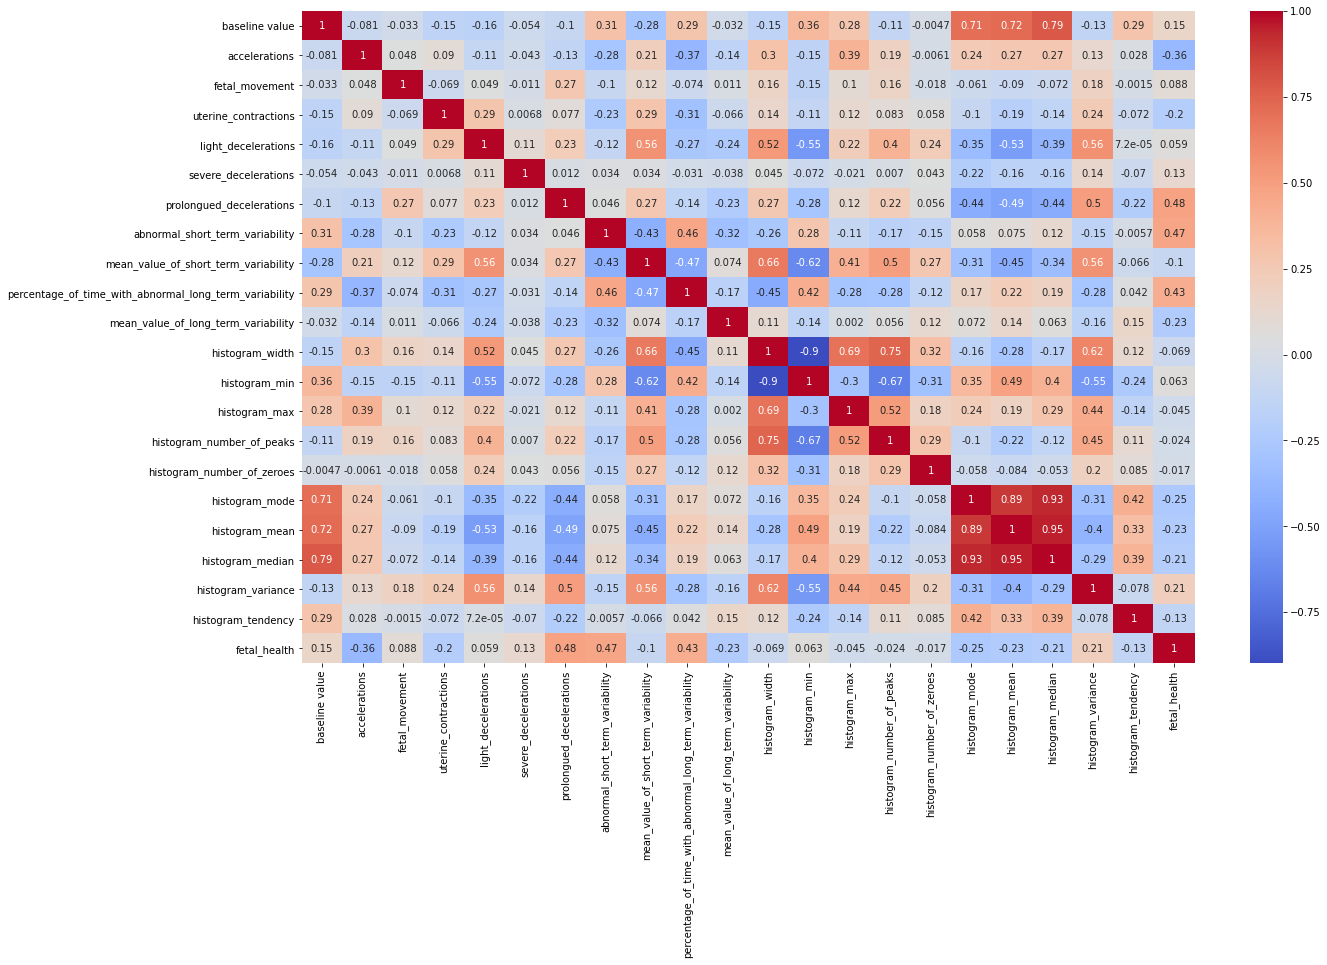

In [4]:
# Understand the correlation between differnt variables in the dataset
corr = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, cmap="coolwarm", annot=True)

In [5]:
data['fetal_health'] = data['fetal_health'].astype('int')
data['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

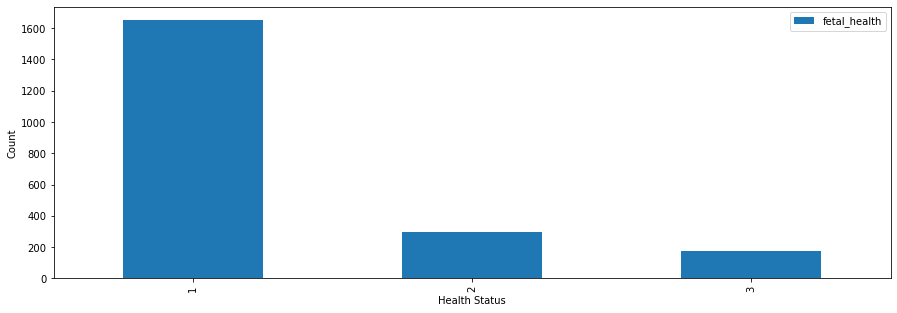

In [6]:
plt.figure(figsize=(15,5))
data.fetal_health.value_counts().plot(kind='bar')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.legend()
plt.show()

<AxesSubplot:ylabel='fetal_health'>

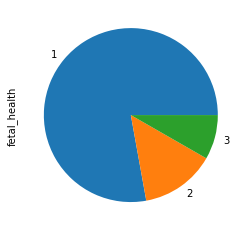

In [7]:
''' Visualising through Pie chart as well '''
data.fetal_health.value_counts().plot(kind='pie')

### Since there is large imbalance of classes in our data set, we can perform over sampling or down sampling.

In [8]:
""" Before Over Sampling """
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape,y.shape)
print(Counter(y))

(2126, 21) (2126,)
Counter({1: 1655, 2: 295, 3: 176})


In [9]:
''' After Over Sampling '''
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(X.shape,y.shape)
print(Counter(y))

(4965, 21) (4965,)
Counter({2: 1655, 1: 1655, 3: 1655})


### We can perform Feature scaling on our predictor variabes since they all are of numerical data type.

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,precision_recall_curve,confusion_matrix,classification_report

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,shuffle=True,stratify=y,random_state = 42)

In [13]:
lr_model = LogisticRegression(penalty='l2',dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=42,
    solver='lbfgs',
    max_iter=100,
    multi_class='ovr',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

In [14]:
y_pred_train = lr_model.fit(x_train,y_train)

y_pred_test = lr_model.predict(x_test)

In [15]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[282,  42,   7],
       [ 11, 290,  30],
       [  5,  40, 286]])

In [16]:
report = classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           1       0.95      0.85      0.90       331
           2       0.78      0.88      0.83       331
           3       0.89      0.86      0.87       331

    accuracy                           0.86       993
   macro avg       0.87      0.86      0.87       993
weighted avg       0.87      0.86      0.87       993



## Thus, with the help of over sampling technique,  we have successfully improved our Precision and Recall Scores for our different classes in target variable.

### We can also use other enhanced Classifiers as well for improving our scores.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=42,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)

rf_clf.fit(x_train,y_train)

y_pred_rf = rf_clf.predict(x_test)

In [20]:
report_rf = classification_report(y_test,y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       331
           2       0.96      0.98      0.97       331
           3       1.00      1.00      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



### Here, we can see that Random Forest Classifier helped us in improving our scores much further.